In [13]:
import pandas as pd 
import numpy as np
restaurant = ['王品牛排','石二鍋','夏慕尼','原燒','陶板屋','瓦城','非常泰','1010湘','大心新泰式麵食','時時香']
restdatadict = {}
for name in restaurant:
    data = pd.read_csv(name+'.csv')
    restdatadict[name]=data

In [31]:
import re
data = '王品牛排.csv'
dataname = re.findall(r'[^.a-z]+',data)
dataname

['王品牛排']

In [6]:
list(restdatadict.keys())[0:5]

['王品牛排', '石二鍋', '夏慕尼', '原燒', '陶板屋']

In [14]:
# pd.set_option('display.max_rows',None)
time = {}
for rest in restdatadict:
    single_time = restdatadict[rest].loc[:,'date'].to_list()
    time[rest]=single_time
#time裡面是各個餐廳資料的日期{餐廳名稱:日期陣列}
monthdict = {}
for rest in time:
    datelist = time[rest]
    single_month = []
    for month in datelist:
        try:
            month = month.split("-")[1]
            single_month.append(month)
        except:
            single_month.append("")
        monthdict[rest]=single_month
# monthdict

In [15]:
season = {'01':'spring',
          '02':'spring',
          '03':'spring',
          '04':'summer',
          '05':'summer',
          '06':'summer',
          '07':'autumn',
          '08':'autumn',
          '09':'autumn',
          '10':'winter',
          '11':'winter',
          '12':'winter'}
for rest in restdatadict:
    monthlist=monthdict[rest]
    restdatadict[rest]["month"] = monthlist##插入月份欄位
    restdatadict[rest]["season"] = monthlist##插入季節欄位
    restdatadict[rest]["season"] = restdatadict[rest]["season"].map(season)
    restdatadict[rest]["restaurant"]=rest##插入餐廳欄位
    restdatadict[rest].dropna(inplace=True )
    restdatadict[rest].reset_index(drop=True, inplace=True)##清理空值
for rest in restaurant[0:5]:
    restdatadict[rest]["brand"] = "王品集團"
for rest in restaurant[5:10]:
    restdatadict[rest]["brand"] = "瓦城集團"
for rest in restaurant:
    restdatadict[rest]["source"] = "PTT"

In [16]:
all_dataframe = []
for rest in restdatadict:
    all_dataframe.append(restdatadict[rest])
all_data = pd.concat(all_dataframe)#把所有dataframe合併起起來
all_data_bybrand = all_data.loc[:,"brand"]
count_by_brand = all_data_bybrand.value_counts()
##count_by_brand兩個集團個別的數量
pd.set_option('display.max_rows',None)
all_data.reset_index(drop=True, inplace=True)
# all_data 為合併10間餐廳的dataframe


In [42]:
all_data

,title,date,url,content,month,season,restaurant,brand,source
0,[食記] 台北 王品牛排 經典牛排23種餐飲全分享,2022-01-16,https://www.ptt.cc/bbs/Food/M.1642318058.A.B80...,作者gillianshine (☆earrings☆)看板Food標題[食記] 台北 王品牛...,01,spring,王品牛排,王品集團,PTT
1,[食記] 台北古亭 王品牛排羅斯福店 家庭聚餐,2022-01-09,https://www.ptt.cc/bbs/Food/M.1641700972.A.EB2...,作者deepthought (molly)看板Food標題[食記] 台北古亭 王品牛排羅斯福...,01,spring,王品牛排,王品集團,PTT
2,[抱怨] 台北 中山 王品牛排 台北中山北店,2021-12-09,https://www.ptt.cc/bbs/Food/M.1639027673.A.943...,作者gjiiiiii (UCCU)看板Food標題[抱怨] 台北 中山 王品牛排 台北中山北...,12,winter,王品牛排,王品集團,PTT
3,[食記] 竹北 王品牛排光明店 推薦法式羊小排,2021-11-20,https://www.ptt.cc/bbs/Food/M.1637385686.A.37C...,作者beareni (Sisi)看板Food標題[食記] 王品牛排光明店 推薦法式羊小排時間...,11,winter,王品牛排,王品集團,PTT
4,[食記] 桃園區 王品牛排,2021-03-23,https://www.ptt.cc/bbs/Food/M.1616479158.A.A8A...,作者womandddd (柏妮絲小姐)看板Food標題[食記] 桃園區 王品牛排時間Tue ...,03,spring,王品牛排,王品集團,PTT
5,[食記] 媽媽的生日晚餐|小巨蛋站。王品牛排,2021-03-20,https://www.ptt.cc/bbs/Food/M.1616248015.A.064...,作者eubrooke (NittleyLion)看板Food標題[食記] 媽媽的生日晚餐|小...,03,spring,王品牛排,王品集團,PTT
6,[食記] 台南 王品牛排 台南健康店 老豪宅氣氛佳,2020-08-20,https://www.ptt.cc/bbs/Food/M.1597929850.A.C96...,作者oldfather (oldfather)看板Food標題[食記] 台南 王品牛排 台南...,08,autumn,王品牛排,王品集團,PTT
7,[食記] 全台 王品牛排外帶 400元超值經典牛小排,2020-06-13,https://www.ptt.cc/bbs/Food/M.1592051841.A.7FE...,作者mapleleaves (摩那卡monaka)看板Food標題[食記] 全台 王品牛排外...,06,summer,王品牛排,王品集團,PTT
8,[食記] 台北 王品牛排中山北路店,2020-05-19,https://www.ptt.cc/bbs/Food/M.1589860862.A.62B...,作者circuspurin (程布布)看板Food標題[食記] 台北 王品牛排中山北路店時間...,05,summer,王品牛排,王品集團,PTT
9,[食記] 台北古亭 王品牛排 睽違多年再次吃到,2019-11-01,https://www.ptt.cc/bbs/Food/M.1572602098.A.4C4...,作者goodcutecat (dora)看板Food標題[食記] 台北古亭 王品牛排 睽違多...,11,winter,王品牛排,王品集團,PTT


52
67
56
78


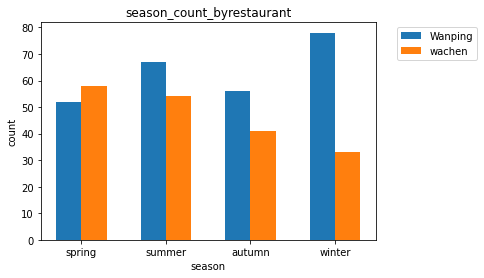

In [41]:
import matplotlib.pyplot as plt
import numpy as np
seasonname = ['spring','summer','autumn','winter']
brandcount_by_season_list_wanping = []
brandcount_by_season_list_wachen = []
##依據品牌計算資料在各季節的筆數
for season in seasonname:
    for brand in ["王品集團","瓦城集團"]:
        brandcount_by_season = all_data.loc[all_data["season"]==season].loc[all_data["brand"]==brand]
        if brand == '王品集團':
            print((brandcount_by_season.loc[:,"season"].value_counts()).values[0])
            brandcount_by_season_list_wanping.append((brandcount_by_season.loc[:,"season"].value_counts()).values[0])
        else:
            brandcount_by_season_list_wachen.append((brandcount_by_season.loc[:,"season"].value_counts()).values[0])
##brandcount_by_season_list (春王品、瓦城)、(夏王品、瓦城)、(秋王品、瓦城)、 (冬王品、瓦城)
x_season = seasonname
y1_season = brandcount_by_season_list_wanping
y2_season = brandcount_by_season_list_wachen
index = np.arange(len(x_season))
bar_width = 0.3
plt.bar(index,height=y1_season,width=bar_width,label='Wanping')
plt.bar(index+bar_width,height=y2_season,width=bar_width,label='wachen')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(index + bar_width/2,x_season)
plt.xlabel('season') # 縱座標軸標題
plt.ylabel('count') # 縱座標軸標題
plt.title('season_count_byrestaurant')
plt.show()


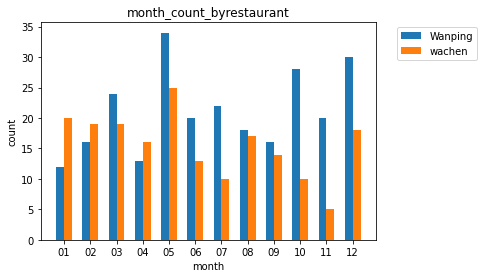

In [385]:
monthlist = ['01','02','03','04','05','06','07','08','09','10','11','12']
brandcount_by_month_list_wanping = []
brandcount_by_month_list_wachen = []
##依據品牌計算資料在各季節的筆數
for month in monthlist:
    for brand in ["王品集團","瓦城集團"]:
        brandcount_by_month = all_data.loc[all_data["month"]==month].loc[all_data["brand"]==brand]
        if brand == '王品集團':
            brandcount_by_month_list_wanping.append(int(brandcount_by_month.loc[:,"month"].value_counts()))
        else:
            brandcount_by_month_list_wachen.append(int(brandcount_by_month.loc[:,"month"].value_counts()))

##brandcount_by_season_list (1月王品、瓦城)、(夏王品、瓦城)、(秋王品、瓦城)、 (冬王品、瓦城)
x_month = monthlist
y1_month = brandcount_by_month_list_wanping
y2_month = brandcount_by_month_list_wachen
index = np.arange(len(x_month))
bar_width = 0.3
plt.bar(index,height=y1_month,width=bar_width,label='Wanping')
plt.bar(index+bar_width,height=y2_month,width=bar_width,label='wachen')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(index + bar_width/2,x_month)
plt.xlabel('month') # 縱座標軸標題
plt.ylabel('count') # 縱座標軸標題
plt.title('month_count_byrestaurant')
plt.show()

In [390]:
brandcount_by_season_list_wanping

[52, 67, 56, 78]

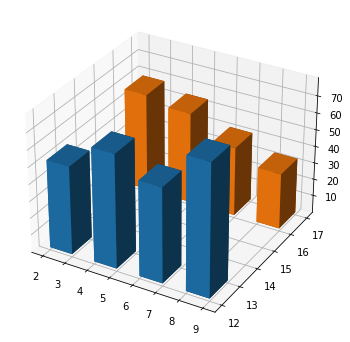

In [467]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
seasonname = ['spring','summer','autumn','winter']
brandcount_by_season_list_wanping = []
brandcount_by_season_list_wachen = []
##依據品牌計算資料在各季節的筆數
for season in seasonname:
    for brand in ["王品集團","瓦城集團"]:
        brandcount_by_season = all_data.loc[all_data["season"]==season].loc[all_data["brand"]==brand]
        if brand == '王品集團':
            brandcount_by_season_list_wanping.append(int(brandcount_by_season.loc[:,"season"].value_counts()))
        else:
            brandcount_by_season_list_wachen.append(int(brandcount_by_season.loc[:,"season"].value_counts()))
##brandcount_by_season_list (春王品、瓦城)、(夏王品、瓦城)、(秋王品、瓦城)、 (冬王品、瓦城)
x_season = seasonname
y1_season = brandcount_by_season_list_wanping
y2_season = brandcount_by_season_list_wachen
###################################################多層甜甜圈圖表
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
x = [2,4,6,8]
y1 = 12
y2 = 16
z = 1
ax.bar3d(x,y1,z,dx=1,dy=1,dz=y1_season)
ax.bar3d(x,y2,z,dx=1,dy=1,dz=y2_season)
plt.show()

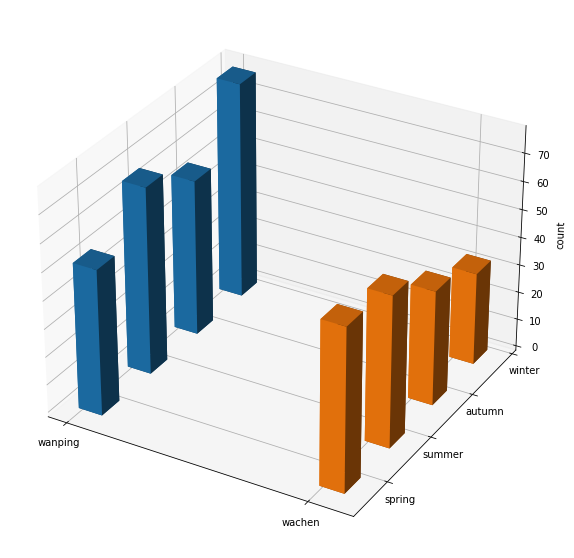

In [496]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
seasonname = ['spring','summer','autumn','winter']
brandcount_by_season_list_wanping = []
brandcount_by_season_list_wachen = []
##依據品牌計算資料在各季節的筆數
for season in seasonname:
    for brand in ["王品集團","瓦城集團"]:
        brandcount_by_season = all_data.loc[all_data["season"]==season].loc[all_data["brand"]==brand]
        if brand == '王品集團':
            brandcount_by_season_list_wanping.append(int(brandcount_by_season.loc[:,"season"].value_counts()))
        else:
            brandcount_by_season_list_wachen.append(int(brandcount_by_season.loc[:,"season"].value_counts()))
##brandcount_by_season_list (春王品、瓦城)、(夏王品、瓦城)、(秋王品、瓦城)、 (冬王品、瓦城)
x_season = seasonname
y1_season = brandcount_by_season_list_wanping
y2_season = brandcount_by_season_list_wachen
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
ax.bar3d([0]*4,[2,4,6,8],[0]*4,0.1,0.7,y1_season)
ax.bar3d([1]*4,[2,4,6,8],[0]*4,0.1,0.7,y2_season)

ax.set_xticks([0,1])
ax.set_xticklabels(['wanping','wachen'])
ax.set_yticks([3,5,7,9])
ax.set_yticklabels(x_season)
ax.set_zlabel('count')
plt.show()

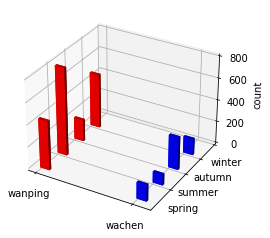

<Figure size 720x720 with 0 Axes>

In [459]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
df = pd.DataFrame({'男性':(450,800,200,500),'女性':(150,100,300,150)})

ax = plt.subplot(projection='3d')
fig = plt.figure(figsize=(10,10))
ax.bar3d([0]*4,range(4),[0]*4,0.1,0.1,df['男性'].values,color='r')
ax.bar3d([1]*4,range(4),[0]*4,0.1,0.1,df['女性'].values,color='b')

ax.set_xticks([0,1])
ax.set_xticklabels(['wanping','wachen'])
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(['spring','summer','autumn','winter'])
ax.set_zlabel('count')
plt.show()

In [386]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.violinplot(x="restaurant",y="month_int",data=new1)